# Case Study Assignment: Predicting House Prices Using Linear Regression

## Problem Statement:
You are provided with a dataset containing various attributes of houses, including their price. Your task is to perform data analysis, build a linear regression model to predict house prices, and evaluate the model using statistical and machine learning techniques.


### 1. Exploratory Data Analysis (EDA)

#### • Load the dataset and display the first few rows.

In [226]:
import pandas as pd
import numpy as np

In [227]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### • Basic Statistical Analysis

In [229]:
### Using describe() to get a statistical summary of the data:

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [230]:
### Computing the mean, median, and mode for key features:

df['price'].mean(), df['price'].median(), df['price'].mode()

(540088.1417665294,
 450000.0,
 0    350000.0
 1    450000.0
 Name: price, dtype: float64)

#### • Handling Missing Data

In [232]:
### Checking for missing values

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### • Visualizing Relationships

Scatterplots

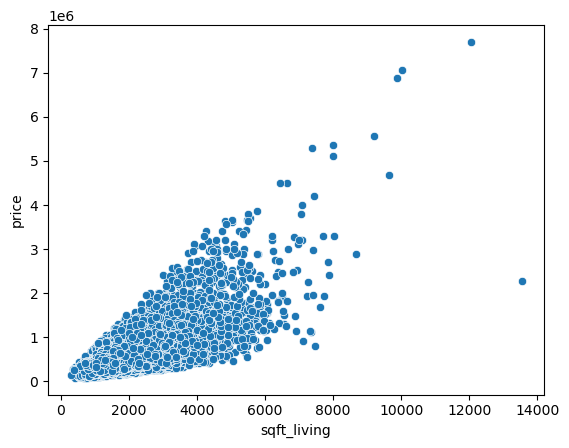

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.show()

Histograms

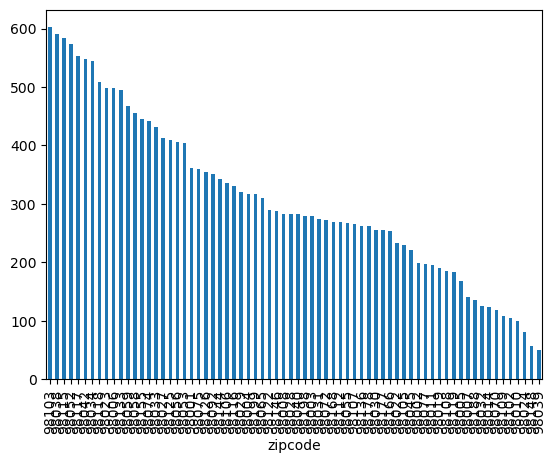

In [237]:
df['zipcode'].value_counts().plot(kind='bar')
plt.show()

#### • Correlation Heatmap

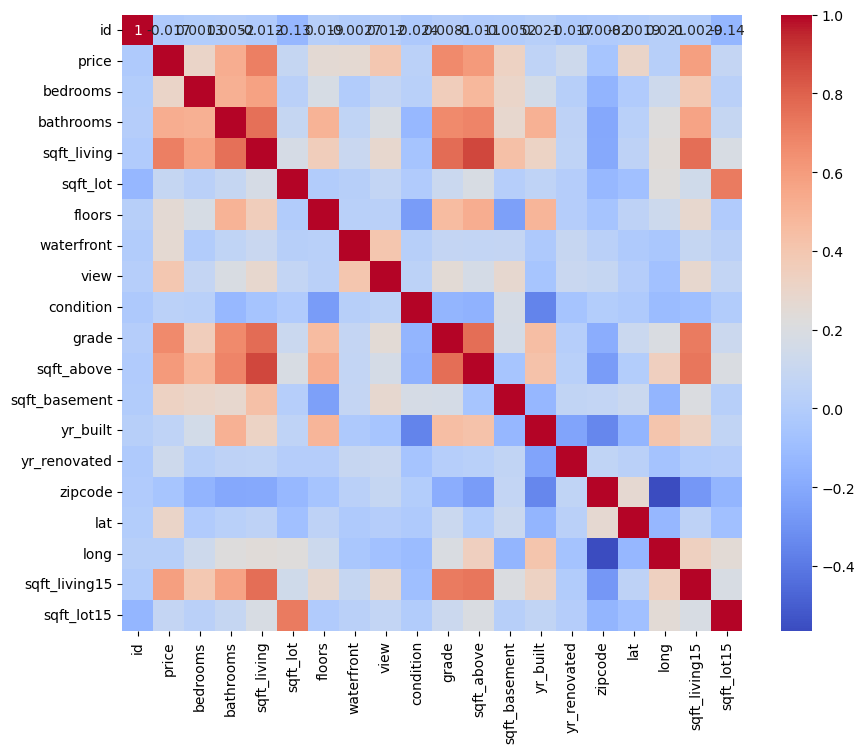

In [239]:
numeric_df = df.select_dtypes(include=['number'])


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### 2. Data Preprocessing

#### • Categorical Data Encoding

In [242]:
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,True,False,False,False,False,False,False,False,False,False
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False


#### • Standardize or normalize the features if necessary (use StandardScaler)

In [244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['sqft_living', 'sqft_lot', 'price']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot', 'price']])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,20141013T000000,-0.866717,3,1.00,-0.979835,-0.228321,1.0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,6414100192,20141209T000000,-0.005688,3,2.25,0.533634,-0.189885,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,5631500400,20150225T000000,-0.980849,2,1.00,-1.426254,-0.123298,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,20141209T000000,0.174090,4,3.00,-0.130550,-0.244014,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,20150218T000000,-0.081958,3,2.00,-0.435422,-0.169653,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,-0.490545,3,2.50,-0.598746,-0.337424,3.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21609,6600060120,20150223T000000,-0.381588,4,2.50,0.250539,-0.224386,2.0,0,0,...,True,False,False,False,False,False,False,False,False,False
21610,1523300141,20140623T000000,-0.375865,2,0.75,-1.154047,-0.332137,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21611,291310100,20150116T000000,-0.381588,3,2.50,-0.522528,-0.307076,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False


#### • Train-Test Split

In [246]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,20141013T000000,-0.866717,3,1.00,-0.979835,-0.228321,1.0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,6414100192,20141209T000000,-0.005688,3,2.25,0.533634,-0.189885,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,5631500400,20150225T000000,-0.980849,2,1.00,-1.426254,-0.123298,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,20141209T000000,0.174090,4,3.00,-0.130550,-0.244014,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,20150218T000000,-0.081958,3,2.00,-0.435422,-0.169653,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,-0.490545,3,2.50,-0.598746,-0.337424,3.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21609,6600060120,20150223T000000,-0.381588,4,2.50,0.250539,-0.224386,2.0,0,0,...,True,False,False,False,False,False,False,False,False,False
21610,1523300141,20140623T000000,-0.375865,2,0.75,-1.154047,-0.332137,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
21611,291310100,20150116T000000,-0.381588,3,2.50,-0.522528,-0.307076,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False


### 3. Building the Linear Regression Model

#### • Building the Model

In [250]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df is our Dataframe

# Convert 'date' to datetime and extract useful features (year, month)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original 'date' column (if you don't need it)
df = df.drop(columns=['date'])

# Now, create feature matrix X and target y
X = df.drop(columns=['price'])  # Drop the target variable 'price'
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model trained successfully!")

Model trained successfully!


#### • Make Predictions

In [252]:
y_pred = model.predict(X_test)

#### • Performance Metrics

In [254]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}, MSE: {mse}')

R-squared: 0.8081257413880891, MSE: 0.21522295492864127


### 4. Ordinary Least Squares (OLS) Regression

#### • Using Statsmodels

In [257]:
print(X_train.dtypes)
print(y_train.dtypes)

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
                  ...   
zipcode_98198       bool
zipcode_98199       bool
year               int32
month              int32
day                int32
Length: 90, dtype: object
float64


In [263]:
# Converting all columns in X_train and y_train to numeric if possible
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,year,month,day
0,7129300520,-0.866717,3,1.00,-0.979835,-0.228321,1.0,0,0,3,...,False,False,False,True,False,False,False,2014,10,13
1,6414100192,-0.005688,3,2.25,0.533634,-0.189885,2.0,0,0,3,...,False,False,False,False,False,False,False,2014,12,9
2,5631500400,-0.980849,2,1.00,-1.426254,-0.123298,1.0,0,0,3,...,False,False,False,False,False,False,False,2015,2,25
3,2487200875,0.174090,4,3.00,-0.130550,-0.244014,1.0,0,0,5,...,False,False,False,False,False,False,False,2014,12,9
4,1954400510,-0.081958,3,2.00,-0.435422,-0.169653,1.0,0,0,3,...,False,False,False,False,False,False,False,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,-0.490545,3,2.50,-0.598746,-0.337424,3.0,0,0,3,...,False,False,False,False,False,False,False,2014,5,21
21609,6600060120,-0.381588,4,2.50,0.250539,-0.224386,2.0,0,0,3,...,False,False,False,False,False,False,False,2015,2,23
21610,1523300141,-0.375865,2,0.75,-1.154047,-0.332137,2.0,0,0,3,...,False,False,False,False,False,False,False,2014,6,23
21611,291310100,-0.381588,3,2.50,-0.522528,-0.307076,2.0,0,0,3,...,False,False,False,False,False,False,False,2015,1,16


In [265]:
# Check for missing values in X_train and y_train
print(X_train.isnull().sum())
print(y_train.isnull().sum())

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
                ..
zipcode_98198    0
zipcode_98199    0
year             0
month            0
day              0
Length: 90, dtype: int64
0


In [267]:
# Drop rows with NaN values in X_train and y_train
X_train_clean = X_train.dropna()
y_train_clean = y_train.dropna()

# Align indices of X_train_clean and y_train_clean
common_index = X_train_clean.index.intersection(y_train_clean.index)
X_train_clean = X_train_clean.loc[common_index]
y_train_clean = y_train_clean.loc[common_index]

In [271]:
# Check rows where X_train or y_train still contain invalid data
print(X_train_clean.isnull().sum())
print(y_train_clean.isnull().sum())

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
                ..
zipcode_98198    0
zipcode_98199    0
year             0
month            0
day              0
Length: 90, dtype: int64
0


In [273]:
# Check if y_train has any missing values or non-numeric values
print(y_train.isnull().sum())  # Should return 0 if everything is fine
print(y_train.dtypes)  # Should return a numeric type, ideally int64 or float64

0
float64


In [277]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-2.42128368e-12 -7.26117206e-02  7.45326970e-02  9.92014763e-07
  2.64490471e-02 -1.27883412e-01  1.75480124e+00  1.51286641e-01
  6.94533541e-02  1.52910508e-01  5.66174326e-04  3.45553404e-04
 -2.03113363e-03  4.99659907e-05  5.54674097e-01 -3.56551885e-01
  2.86401778e-05 -2.79373493e-07  8.62706251e-02 -6.57122138e-02
  1.91608152e+00  6.88538505e-01  6.61039709e-01  5.41649975e-01
  5.61037725e-01  2.64566274e-01  1.14432732e-01  2.40665004e-01
  1.28166507e-01  1.36586210e-01 -1.35737483e-01  4.02242798e-01
  4.29246870e-01  9.34378759e-02  5.44290983e-01  1.09827488e-02
  1.32393883e-02 -2.97458331e-02  8.18233261e-01  3.43197794e-01
  1.47108844e-01  3.30287413e+00  1.29415354e+00  2.14057455e-02
  3.60506985e-01  4.80743279e-01  4.20990948e-01  7.52248357e-02
  1.80351323e-01  4.38699343e-02  1.66546380e-01  2.59137401e-01
 -2.10569095e-01  2.10786064e-01  3.82534305e-01  3.75445187e-01
  1.46557845e-01 -3.11184129e-02  1.24908663e+00  7.16110837e-01
  1.0643666

### 5. Model Evaluation

#### 5.1 Comparing Sklearn and OLS Models
Compare performance (R-squared, MSE) between the Scikit-learn and statsmodels OLS models.
Discuss how the results differ and why.
#### 5.2 Residual Analysis
Visualize residuals to check for patterns (homoscedasticity, normality of errors):

C:\Users\kusum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


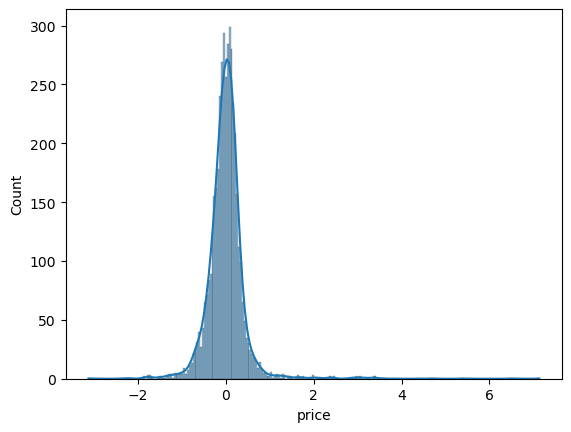

In [288]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()